# Lasso Regression

 Lasso regression is like linear regression where the coefficients of determination are shrunk towards zero. 
The lasso regression allows you to shrink or regularize these coefficients to avoid overfitting and make them work better on different datasets. 

# Import libraries

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Data Visualization
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [47]:
data = pd.read_csv("Mall_Customers (1).csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Exploratory data analysis

In [48]:
data.shape

(200, 5)

In [49]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [50]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [51]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [52]:
data['Spending Score (1-100)'].value_counts()

42    8
55    7
46    6
73    6
35    5
     ..
31    1
82    1
24    1
23    1
99    1
Name: Spending Score (1-100), Length: 84, dtype: int64

# Data visualization

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Age'>

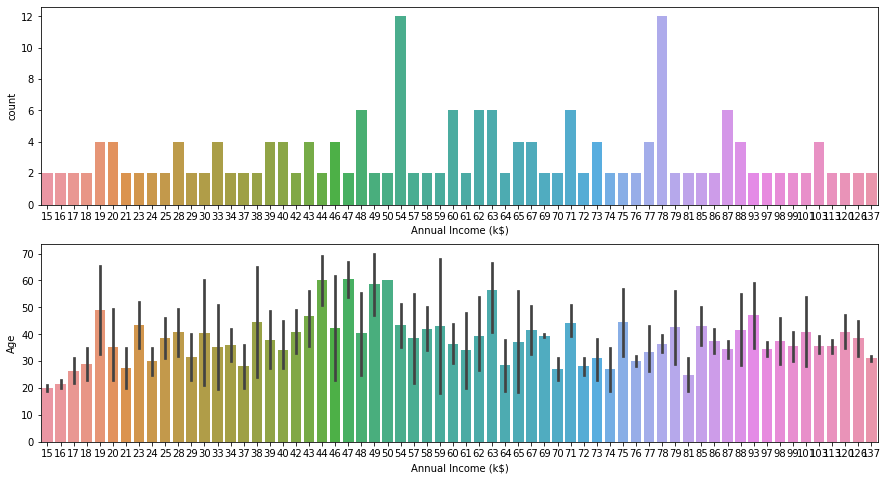

In [53]:
#categorical to categorical
fig, (ax1,ax2) = plt.subplots(2, 1, figsize = (15, 8))
sns.countplot(x = 'Annual Income (k$)', data = data, ax=ax1)
sns.barplot(x = 'Annual Income (k$)', y = 'Age', data = data, ax=ax2) 


<AxesSubplot:>

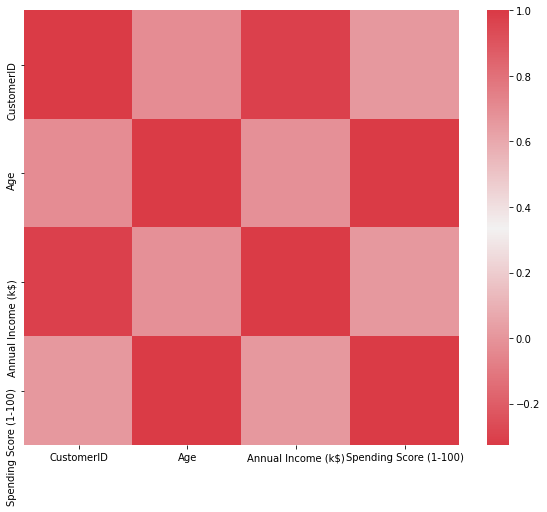

In [54]:
#Visualization of data 
# correlation plot
corr = data.corr()
f, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(corr, mask = np.zeros_like(corr,dtype = np.bool), 
            cmap = sns.diverging_palette(10, 10, as_cmap = True), square = True, ax = ax)

# Dataset spliting

In [55]:
from sklearn import datasets
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [56]:
x = data.iloc[:, [2, 3]].values
y = data.iloc[:, 4].values
print(x.shape)
print(y.shape)

(200, 2)
(200,)


In [57]:
#Catgorical data  
#for Country Variable 

from sklearn.preprocessing import LabelEncoder  
label_encoder_x= LabelEncoder()  
x[:, 1]= label_encoder_x.fit_transform(x[:, 1])  

In [58]:
#encoding for purchased variable  

labelencoder_y= LabelEncoder()  
y= labelencoder_y.fit_transform(y)  

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [60]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(140, 2)
(140,)
(60, 2)
(60,)


# Build the lasso model

In [61]:
## Build the lasso model with alpha

model_lasso = Lasso(alpha=1)
model_lasso.fit(x_train, y_train)
pred_train_lasso= model_lasso.predict(x_train)
pred_test_lasso= model_lasso.predict(x_test)

# Evaluate the lasso model

In [62]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso)))

21.06829404790482
19.37978435902359


we have set the lasso hyperparameter - alpha as 1 or a full penalty. This alpha value is giving us a decent RMSE as of now. 
using this regression mean_squared_error show approximate 21% for training data and mean_squared_error show approximate 19% for predicting data.